In [1]:
import pandas as pd

# Load the Excel file and check available sheet names
excel_path = "/content/sample_data/phonepe-pulse_raw-data_q12018-to-q22021-v0-1-5-1720351752.xlsx"
xls = pd.ExcelFile(excel_path)
sheet_names = xls.sheet_names
sheet_names

# Load key sheets for analysis
state_txn_users = xls.parse("State_Txn and Users")
state_txn_split = xls.parse("State_TxnSplit")
district_txn_users = xls.parse("District_Txn and Users")

# Preview the first few rows of the main sheet
state_txn_users.head()


,State,Year,Quarter,Transactions,Amount (INR),ATV (INR),Registered Users,App Opens
0,Andaman & Nicobar Islands,2018,1,6658,1.463176e+07,2197.621091,6740,0
1,Andaman & Nicobar Islands,2018,2,11340,2.833854e+07,2498.989022,9405,0
2,Andaman & Nicobar Islands,2018,3,16265,5.555747e+07,3415.768284,12149,0
3,Andaman & Nicobar Islands,2018,4,23758,9.054834e+07,3811.277720,15222,0
4,Andaman & Nicobar Islands,2019,1,30486,1.022997e+08,3355.630147,18596,0


/tmp/ipython-input-2-2612952131.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=state_amount.values, y=state_amount.index, palette="viridis")


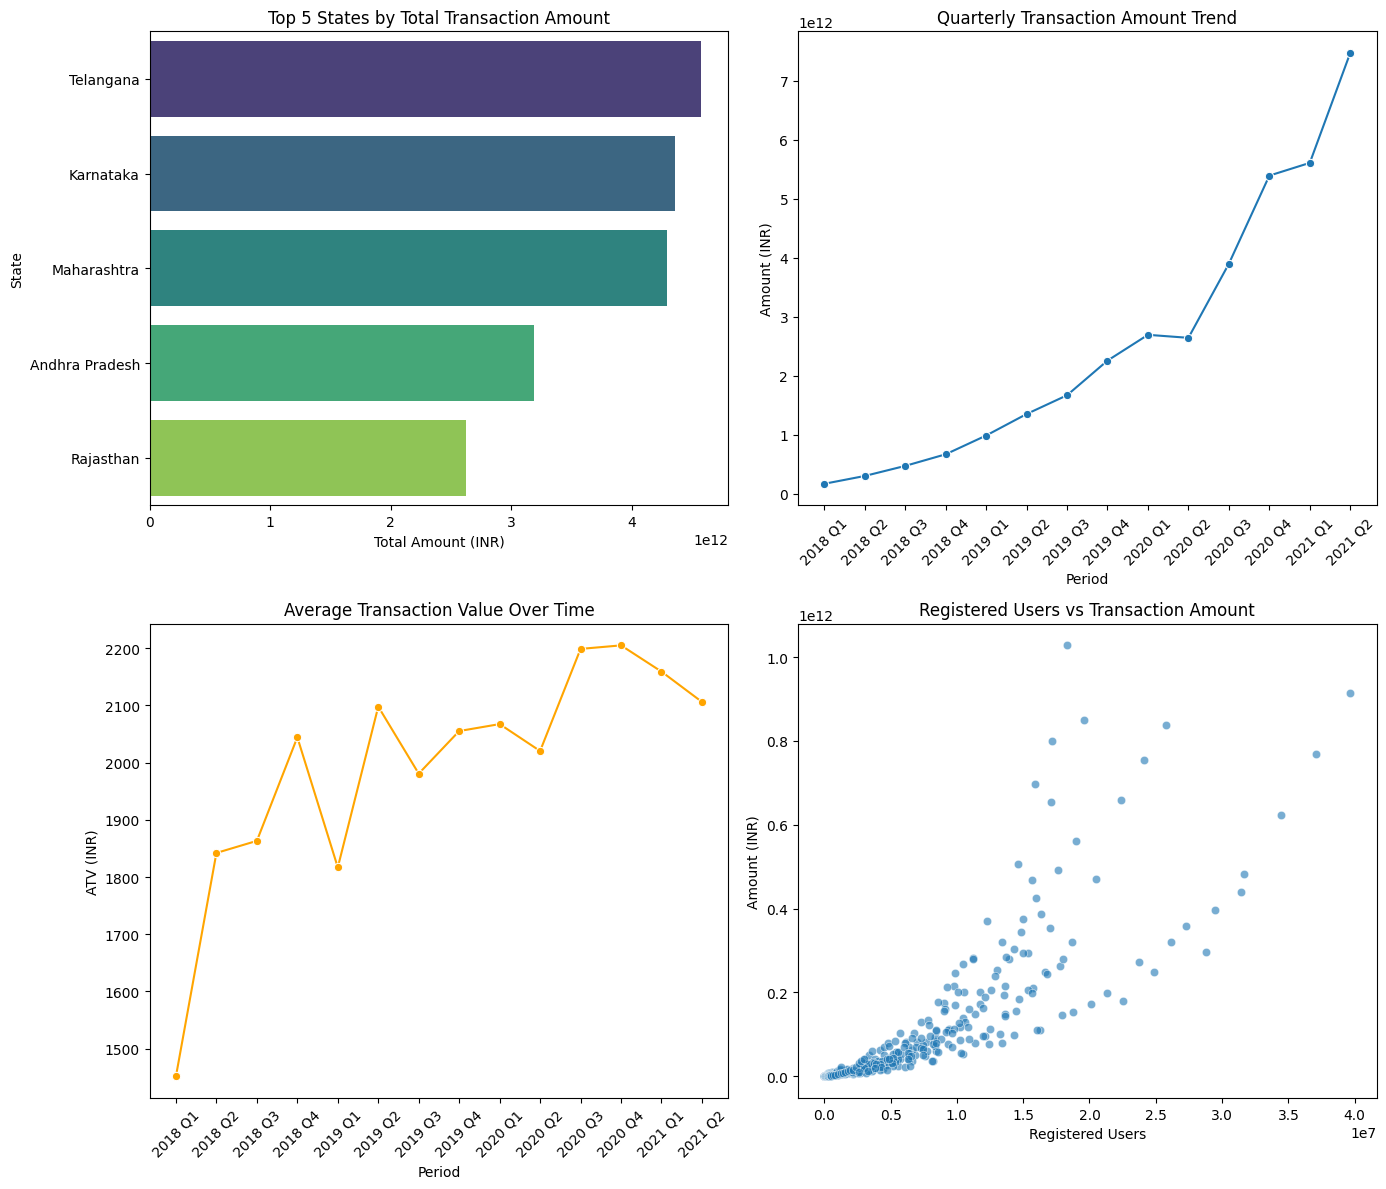

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Total transaction amount per state (top 5)
state_amount = state_txn_users.groupby("State")["Amount (INR)"].sum().sort_values(ascending=False).head(5)

# 2. Quarterly transaction trend (all India)
quarterly_trend = state_txn_users.groupby(["Year", "Quarter"])["Amount (INR)"].sum().reset_index()
quarterly_trend["Period"] = quarterly_trend["Year"].astype(str) + " Q" + quarterly_trend["Quarter"].astype(str)

# 3. Average Transaction Value trend
atv_trend = state_txn_users.groupby(["Year", "Quarter"])["ATV (INR)"].mean().reset_index()
atv_trend["Period"] = atv_trend["Year"].astype(str) + " Q" + atv_trend["Quarter"].astype(str)

# 4. Correlation: Users vs Transaction Amount
correlation_data = state_txn_users[["Registered Users", "Amount (INR)"]]

# Plotting
plt.figure(figsize=(14, 12))

# Plot 1: Top 5 states by transaction amount
plt.subplot(2, 2, 1)
sns.barplot(x=state_amount.values, y=state_amount.index, palette="viridis")
plt.title("Top 5 States by Total Transaction Amount")
plt.xlabel("Total Amount (INR)")

# Plot 2: Quarterly transaction trend
plt.subplot(2, 2, 2)
sns.lineplot(data=quarterly_trend, x="Period", y="Amount (INR)", marker='o')
plt.xticks(rotation=45)
plt.title("Quarterly Transaction Amount Trend")

# Plot 3: Average transaction value trend
plt.subplot(2, 2, 3)
sns.lineplot(data=atv_trend, x="Period", y="ATV (INR)", marker='o', color="orange")
plt.xticks(rotation=45)
plt.title("Average Transaction Value Over Time")

# Plot 4: Correlation plot
plt.subplot(2, 2, 4)
sns.scatterplot(data=correlation_data, x="Registered Users", y="Amount (INR)", alpha=0.6)
plt.title("Registered Users vs Transaction Amount")

plt.tight_layout()
plt.show()


In [3]:
# Load the additional sheets for extended analysis
state_txn_split = xls.parse("State_TxnSplit")
state_device_data = xls.parse("State_DeviceData")

# Preview first few rows of each new dataset
state_txn_split_preview = state_txn_split.head()
state_device_data_preview = state_device_data.head()

state_txn_split_preview, state_device_data_preview

(                       State  Year  Quarter          Transaction Type  \
 0  Andaman & Nicobar Islands  2018        1  Recharge & bill payments   
 1  Andaman & Nicobar Islands  2018        1     Peer-to-peer payments   
 2  Andaman & Nicobar Islands  2018        1         Merchant payments   
 3  Andaman & Nicobar Islands  2018        1        Financial Services   
 4  Andaman & Nicobar Islands  2018        1                    Others   
 
    Transactions  Amount (INR)    ATV (INR)  
 0          4200  1.845307e+06   439.358921  
 1          1871  1.213866e+07  6487.790112  
 2           298  4.525072e+05  1518.480432  
 3            33  1.060142e+04   321.255149  
 4           256  1.846899e+05   721.444790  ,
                        State  Year  Quarter    Brand  Registered Users  \
 0  Andaman & Nicobar Islands  2018        1   Xiaomi              1665   
 1  Andaman & Nicobar Islands  2018        1  Samsung              1445   
 2  Andaman & Nicobar Islands  2018        1     Viv

/tmp/ipython-input-4-3624317603.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=txn_type_totals.values, y=txn_type_totals.index, palette="magma")


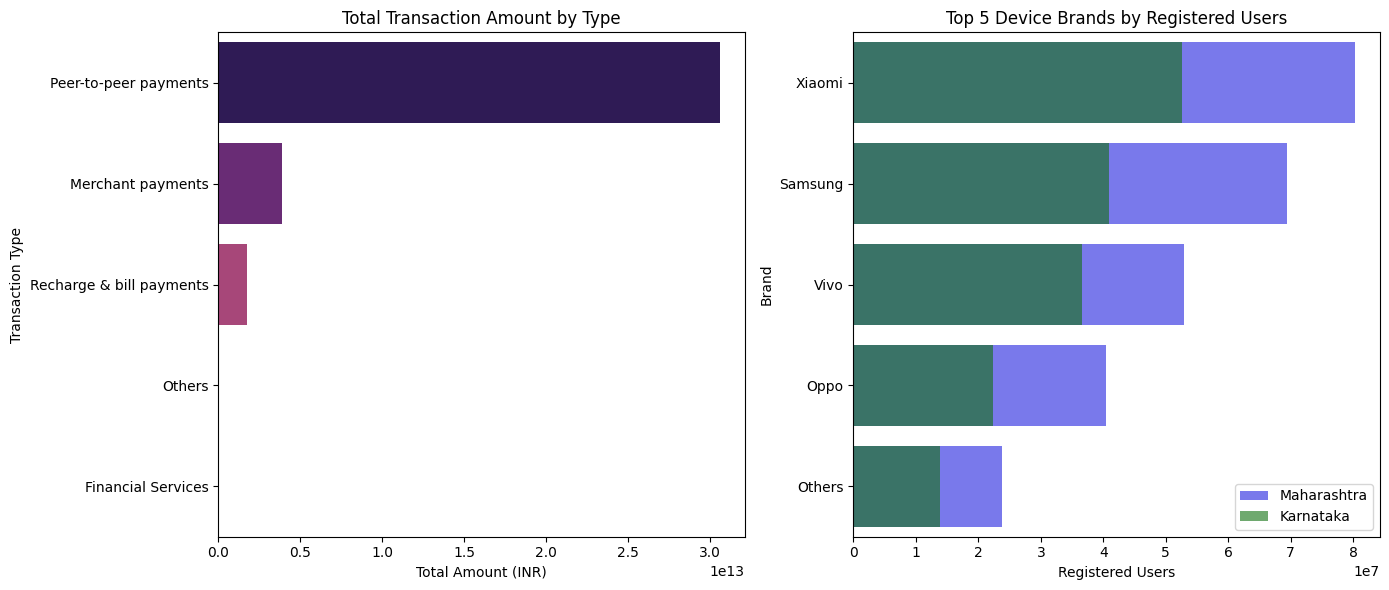

In [4]:
# 1. Top 5 Transaction Types by Total Amount
txn_type_totals = state_txn_split.groupby("Transaction Type")["Amount (INR)"].sum().sort_values(ascending=False)

# 2. Device brand share in Maharashtra and Karnataka
top_states = ["Maharashtra", "Karnataka"]
device_share = state_device_data[state_device_data["State"].isin(top_states)]

# Group by State and Brand to get total registered users
device_share_summary = device_share.groupby(["State", "Brand"])["Registered Users"].sum().reset_index()

# Sort top 5 brands by users per state
top_brands_maha = device_share_summary[device_share_summary["State"] == "Maharashtra"].sort_values("Registered Users", ascending=False).head(5)
top_brands_karna = device_share_summary[device_share_summary["State"] == "Karnataka"].sort_values("Registered Users", ascending=False).head(5)

# Plotting
plt.figure(figsize=(14, 6))

# Plot 1: Transaction types by total amount
plt.subplot(1, 2, 1)
sns.barplot(x=txn_type_totals.values, y=txn_type_totals.index, palette="magma")
plt.title("Total Transaction Amount by Type")
plt.xlabel("Total Amount (INR)")

# Plot 2: Device brand share
plt.subplot(1, 2, 2)
sns.barplot(data=top_brands_maha, x="Registered Users", y="Brand", label="Maharashtra", color="blue", alpha=0.6)
sns.barplot(data=top_brands_karna, x="Registered Users", y="Brand", label="Karnataka", color="green", alpha=0.6)
plt.title("Top 5 Device Brands by Registered Users")
plt.legend()

plt.tight_layout()
plt.show()
